In [2]:
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:


def plotMatrix(data):
  fig, ax = plt.subplots()
  # Using matshow here just because it sets the ticks up nicely. imshow is faster.
  ax.matshow(data, cmap='viridis')
  for (i, j), z in np.ndenumerate(data):
     ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
  plt.show()



In [4]:

# dataset fetched from kaggle: https://www.kaggle.com/roustekbio/breast-cancer-csv

# you should first fetch the dataset from github and upload the dataset to your jetson
data = pd.read_csv("./breastCancer.csv")


## sklearn has built in datasets
## Can you run this also on this wine dataset?

# from sklearn.datasets import load_wine
# data = load_wine()
# data = pd.DataFrame(data.data, columns=data.feature_names)
# data.head()

# import kaggle
# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('breastCancer.csv', path='.', unzip=True)



In [5]:


data.replace('?',-99999, inplace=True)
print(data.axes)
print(data.columns)



[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')


In [6]:
print (data.loc[20])
print (data.shape)

id                   1054590
clump_thickness            7
size_uniformity            3
shape_uniformity           2
marginal_adhesion         10
epithelial_size            5
bare_nucleoli             10
bland_chromatin            5
normal_nucleoli            4
mitoses                    4
class                      4
Name: 20, dtype: object
(699, 11)


In [7]:
print(data.describe())

                 id  clump_thickness  size_uniformity  shape_uniformity  \
count  6.990000e+02       699.000000       699.000000        699.000000   
mean   1.071704e+06         4.417740         3.134478          3.207439   
std    6.170957e+05         2.815741         3.051459          2.971913   
min    6.163400e+04         1.000000         1.000000          1.000000   
25%    8.706885e+05         2.000000         1.000000          1.000000   
50%    1.171710e+06         4.000000         1.000000          1.000000   
75%    1.238298e+06         6.000000         5.000000          5.000000   
max    1.345435e+07        10.000000        10.000000         10.000000   

       marginal_adhesion  epithelial_size  bland_chromatin  normal_nucleoli  \
count         699.000000       699.000000       699.000000       699.000000   
mean            2.806867         3.216023         3.437768         2.866953   
std             2.855379         2.214300         2.438364         3.053634   
min     

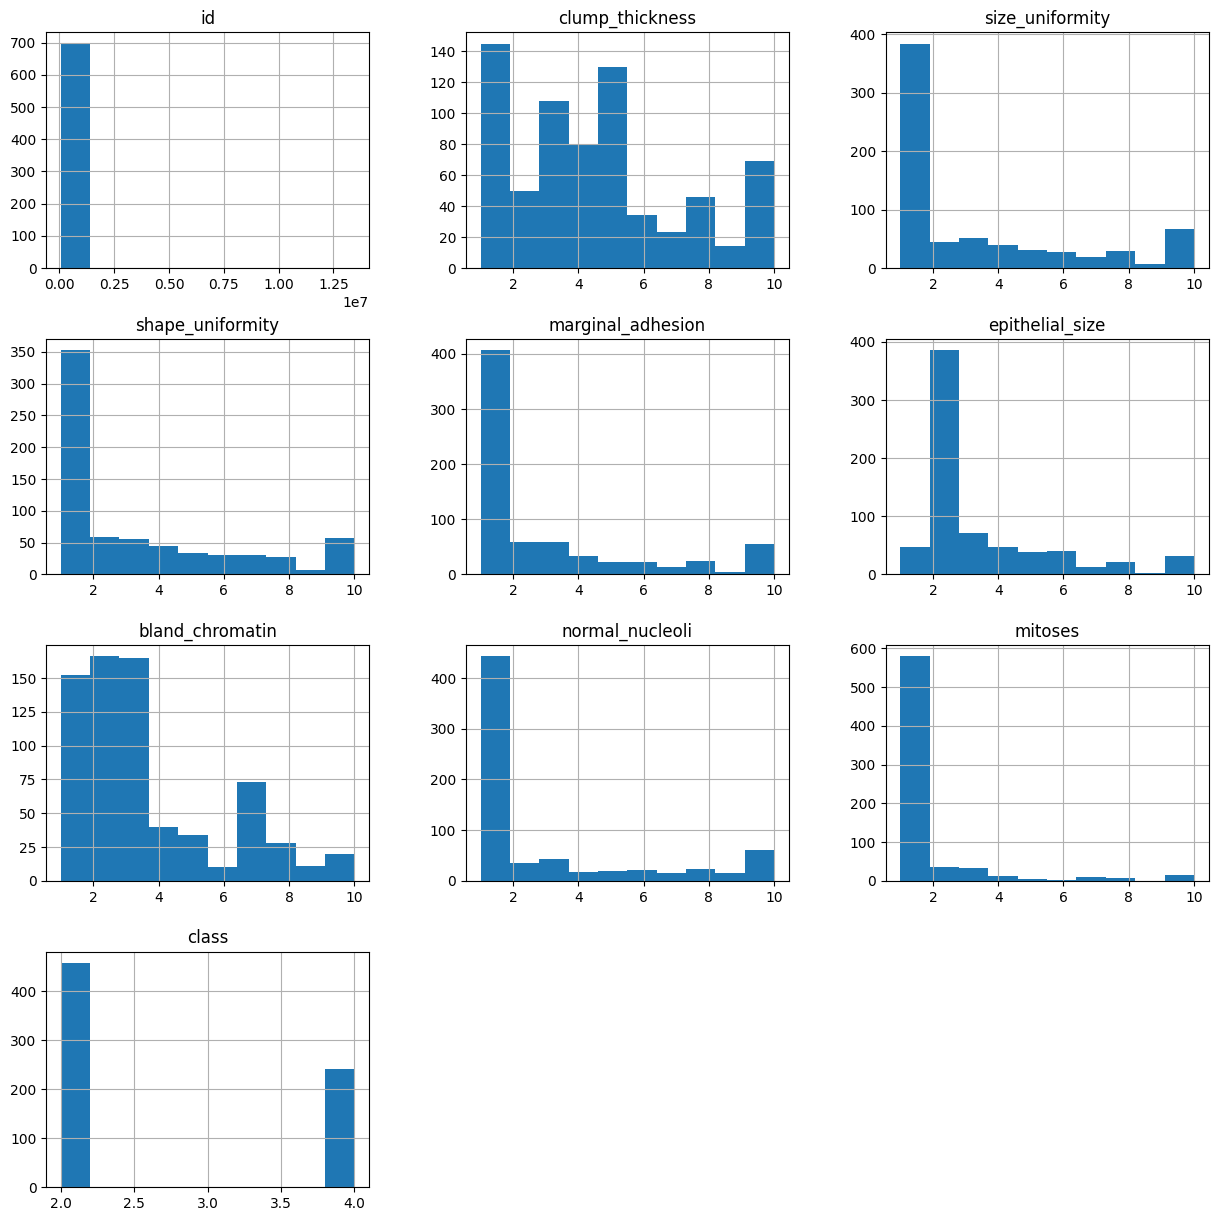

In [8]:
data.hist(figsize=(15,15))
plt.show()

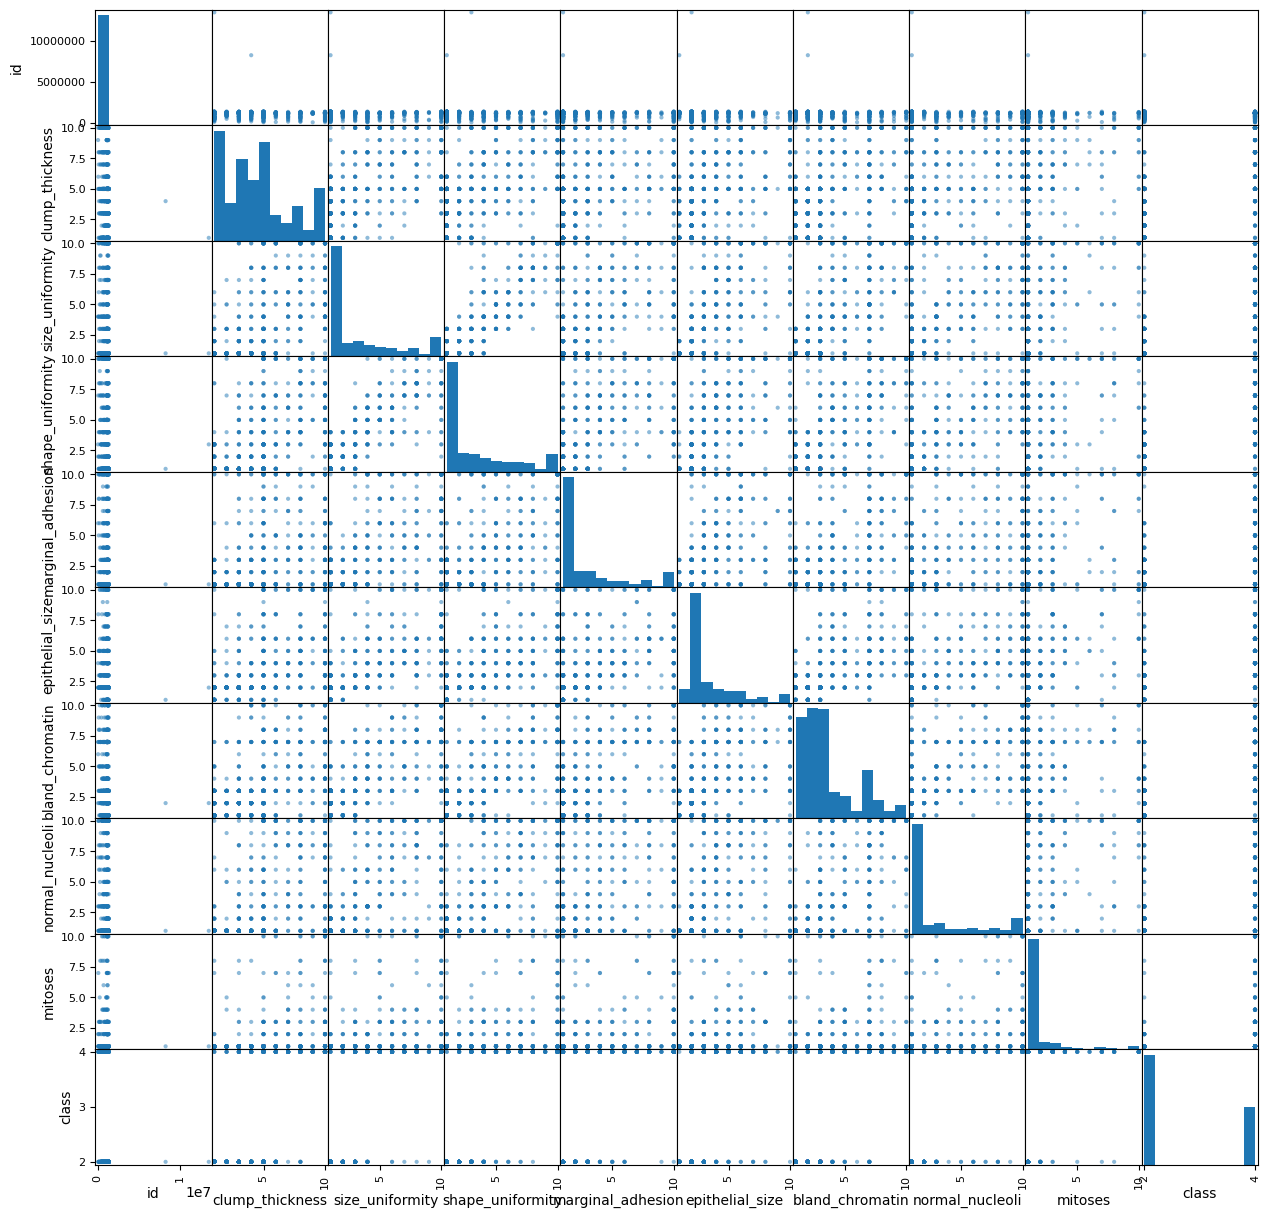

In [9]:
scatter_matrix(data, figsize=(15,15))
plt.show()

In [10]:
corrmat = data.corr()

# #using seaborn
# plt.figure(figsize=(10,10))
# sns.heatmap(corrmat, cmap='viridis', annot=True, linewidths=0.5,)

# plt.imshow(data, cmap='hot')
# plt.show()

# #using matplotlib
# plt.matshow(data.corr())
# plt.show()

#using pandas
corrmat.style.background_gradient(cmap='viridis').set_precision(4)


C:\Users\yanni\AppData\Local\Temp\ipykernel_27700\3441437438.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()
C:\Users\yanni\AppData\Local\Temp\ipykernel_27700\3441437438.py:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrmat.style.background_gradient(cmap='viridis').set_precision(4)


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
id,1.0000,-0.0553,-0.0416,-0.0416,-0.0649,-0.0455,-0.0601,-0.0521,-0.0349,-0.0802
clump_thickness,-0.0553,1.0000,0.6449,0.6546,0.4864,0.5218,0.5584,0.5358,0.3500,0.7160
size_uniformity,-0.0416,0.6449,1.0000,0.9069,0.7056,0.7518,0.7557,0.7229,0.4587,0.8179
shape_uniformity,-0.0416,0.6546,0.9069,1.0000,0.6831,0.7197,0.7359,0.7194,0.4389,0.8189
marginal_adhesion,-0.0649,0.4864,0.7056,0.6831,1.0000,0.5996,0.6667,0.6034,0.4176,0.6968
epithelial_size,-0.0455,0.5218,0.7518,0.7197,0.5996,1.0000,0.6161,0.6289,0.4791,0.6828
bland_chromatin,-0.0601,0.5584,0.7557,0.7359,0.6667,0.6161,1.0000,0.6659,0.3442,0.7566
normal_nucleoli,-0.0521,0.5358,0.7229,0.7194,0.6034,0.6289,0.6659,1.0000,0.4283,0.7122
mitoses,-0.0349,0.3500,0.4587,0.4389,0.4176,0.4791,0.3442,0.4283,1.0000,0.4232
class,-0.0802,0.7160,0.8179,0.8189,0.6968,0.6828,0.7566,0.7122,0.4232,1.0000


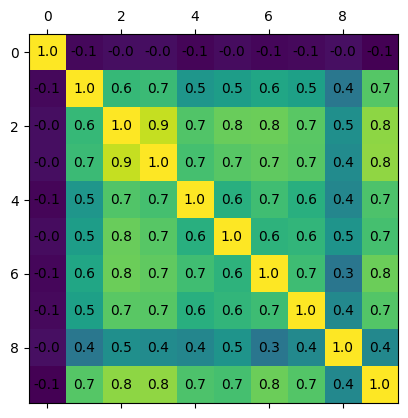

In [11]:


plotMatrix(corrmat)



In [12]:


columns = data.columns.to_list()

columns = [c for c in columns if c not in ["class", "id"]]

target = "class"

X = data[columns]
y = data[target]

print(X.shape)
print(y.shape)




(699, 9)
(699,)


In [13]:


print(X.loc[20])
print(y.loc[20])



clump_thickness       7
size_uniformity       3
shape_uniformity      2
marginal_adhesion    10
epithelial_size       5
bare_nucleoli        10
bland_chromatin       5
normal_nucleoli       4
mitoses               4
Name: 20, dtype: object
4


In [15]:


X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)



In [16]:
seed=5
scoring = 'accuracy'

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(559, 9) (140, 9)
(559,) (140,)


In [17]:


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)



In [18]:
from sklearn.ensemble import RandomForestClassifier

models = []

models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier(max_depth=5, n_estimators=40)))

results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print(cv_results)
  results.append(cv_results)
  names.append(name)
  msg = "%s Algorithm: Accuracy %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

[0.92857143 1.         0.98214286 0.96428571 0.96428571 0.875
 0.96428571 0.91071429 0.92857143 0.98181818]
SVM Algorithm: Accuracy 0.949968 (0.036393)
[0.96428571 1.         0.98214286 0.96428571 0.98214286 0.94642857
 0.94642857 0.96428571 0.94642857 0.98181818]
RFC Algorithm: Accuracy 0.967825 (0.017470)


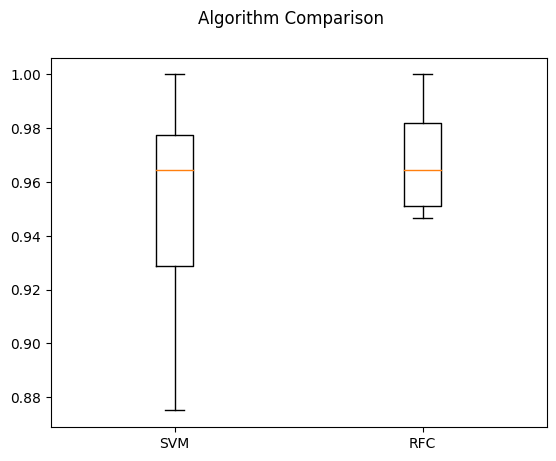

In [19]:


fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



Mean score:  0    0.965694
dtype: float64


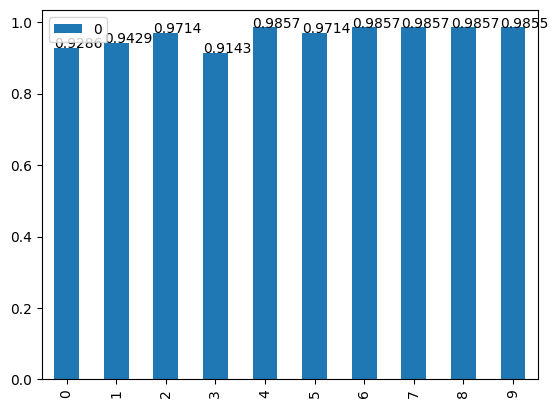

In [20]:


from sklearn.model_selection import cross_val_score
CVSCORE = cross_val_score(RandomForestClassifier(max_depth=5, n_estimators=40), X, y, cv=10)
# print(CVSCORE)
df = pd.DataFrame(CVSCORE)

# cv = StratifiedKFold(10)
ax = df.plot.bar()
for p in ax.patches:
  ax.annotate(str(round(p.get_height(),4)),(p.get_x(), p.get_height())  )
print("Mean score: ", df.mean())




In [21]:


for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(name)
  print(accuracy_score(y_test, predictions))
  print(classification_report(y_test, predictions))



SVM
0.9642857142857143
              precision    recall  f1-score   support

           2       1.00      0.95      0.97        99
           4       0.89      1.00      0.94        41

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

RFC
0.9571428571428572
              precision    recall  f1-score   support

           2       0.98      0.96      0.97        99
           4       0.91      0.95      0.93        41

    accuracy                           0.96       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



In [22]:
from sklearn.metrics import confusion_matrix
predict = model.predict(X_test)
confusion = confusion_matrix(y_test,predict)
print("==== Confusion Matrix ===")
print(confusion)
print('\n')

#using matplotlib
# plt.matshow(confusion)
# plt.show()


# def plotMatrix(data):
#   fig, ax = plt.subplots()
#   # Using matshow here just because it sets the ticks up nicely. imshow is faster.
#   ax.matshow(data, cmap='viridis')
#   for (i, j), z in np.ndenumerate(data):
#      ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
#   plt.show()

# plotMatrix(confusion)

# #using seaborn
# from sklearn import metrics
# cnf_matrix = metrics.confusion_matrix(y_test, predict)
# p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)



#using pandas
pd.DataFrame(confusion).style.background_gradient(cmap='viridis').set_precision(4)

==== Confusion Matrix ===
[[95  4]
 [ 2 39]]




,0,1
0,95,4
1,2,39


In [23]:


from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, predictions)
print("kappa score: ", cohen_score)

from sklearn.metrics import matthews_corrcoef

MCC = matthews_corrcoef(y_test, predictions)
print("MCC score: ", MCC)



kappa score:  0.8979839689094
MCC score:  0.8985036175275269
